In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/"
%cd candlestick_patterns/

In [ ]:
pip install --upgrade mplfinance

**Plotting Candlesticks**

Saving each three day candlestick pattern into a separate folder

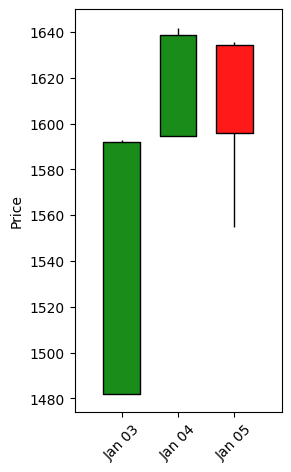

In [25]:
import pandas as pd
import os
import mplfinance as mpf
df = pd.read_csv("NIFTY 50.csv",index_col="Date")
df.index = pd.to_datetime(df.index,dayfirst=True)
mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)
kwargs = dict(type='candle')
#path=os.path.join(os.getcwd(),'triple')
#os.chdir(path)
#for i in range (5353):
#    mpf.plot(df[i:i+3],**kwargs,style=s,scale_width_adjustment=dict(candle=1),figratio=(8,16),savefig=dict(fname='three'+str(df.index[i])[:10],dpi=100,pad_inches=0.25))
#    print(i)

mpf.plot(df[0:3],**kwargs,style=s,scale_width_adjustment=dict(candle=1),figratio=(8,16))

**Determing Target Label**

Morning Star - 1

Evening Star - 2

None - 0 

In [ ]:
Y=[]
for i in range(5351):
     if(  (abs(df.iloc[i+1].Open-df.iloc[i+1].Close)/max(df.iloc[i+1].Open,df.iloc[i+1].Close) )  <=0.01):
         if ( (df.iloc[i].Close<df.iloc[i].Open) & (df.iloc[i+2].Close>df.iloc[i+2].Open) & (df.iloc[i].Open<df.iloc[i+2].Close) & (df.iloc[i].Close>df.iloc[i+2].Open) ):
             Y.append(1)
         elif ( (df.iloc[i].Close>df.iloc[i].Open) & (df.iloc[i+2].Close<df.iloc[i+2].Open) & (df.iloc[i].Open>df.iloc[i+2].Close) & (df.iloc[i].Close<df.iloc[i+2].Open)  ):
             Y.append(2)
         else:
             Y.append(0)
     else:
         Y.append(0)  

Y=pd.DataFrame(Y)
Y.to_csv("Y_star.csv")

**Loading and Resizing Data**

Resizing data into a (224,244,3)

In [4]:
import os
zip_path = '/content/gdrive/My Drive/candlestick_patterns/triple.zip'
!cp "{zip_path}" .
!unzip -q triple.zip
#!rm triple.zip

cp: '/content/gdrive/My Drive/candlestick_patterns/triple.zip' and './triple.zip' are the same file


In [26]:
import cv2
import numpy as np
import pandas as pd
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten,Dropout,InputLayer
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


from sklearn.model_selection import train_test_split

In [27]:
def get_data(data_dir=os.getcwd()):
    data = [] 
    i=0
    path = os.path.join(data_dir, "triple")
    for img in os.listdir(path):
      try:
          img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
          resized_arr = cv2.resize(img_arr, (64, 64)) # Reshaping images to preferred size
          data.append(resized_arr)
          print(i)
          i=i+1
      except Exception as e:
          print(e)


    return np.array(data)

In [ ]:
data=get_data()


(-0.5, 63.5, 63.5, -0.5)

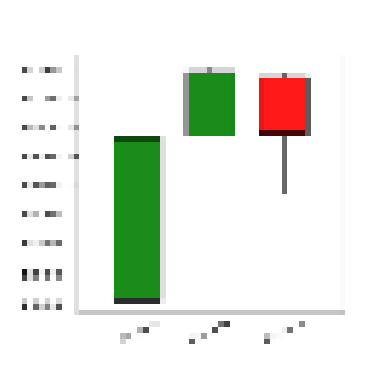

In [29]:
plt.imshow(data[0])
plt.axis('off')

**Loading Target Label**

In [38]:
y=pd.read_csv('/content/gdrive/My Drive/candlestick_patterns/Y_star.csv')
print(y.iloc[:,1].value_counts())
y  = to_categorical(y.iloc[:,1])
y.shape

0    5128
2     127
1      96
Name: 0, dtype: int64


(5351, 3)

**Initializing the CNN Model**

In [45]:
def split(X,y):
  X=X/255.0
  X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
  return X_train,y_train,X_val,y_val,X_test,y_test

In [46]:
def model_star():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform' ,activation='relu', input_shape=(64,64,3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform' ,activation='relu', input_shape=(64,64,3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(1024,kernel_initializer='normal',activation="relu"))
  #model.add(Dropout(0.4))
  #model.add(Dense(256,kernel_initializer='normal',activation="relu"))
  model.add(Dense(3, activation="softmax"))

  model.summary()

  return model

In [55]:
X_train,y_train,X_val,y_val,X_test,y_test = split(data,y)

**Training Model**

In [56]:
from tensorflow.keras.optimizers import SGD
model=model_star()
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=128, epochs=5,validation_data=(X_val,y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              12846080  
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


26/26 [==============================] - 2s 47ms/step - loss: 2.0507 - accuracy: 0.9255 - val_loss: 0.1528 - val_accuracy: 0.9607
Epoch 2/5
26/26 [==============================] - 1s 38ms/step - loss: 0.0981 - accuracy: 0.9604 - val_loss: 0.1023 - val_accuracy: 0.9607
Epoch 3/5
26/26 [==============================] - 1s 37ms/step - loss: 0.0636 - accuracy: 0.9651 - val_loss: 0.0631 - val_accuracy: 0.9645
Epoch 4/5
26/26 [==============================] - 1s 37ms/step - loss: 0.0501 - accuracy: 0.9679 - val_loss: 0.0621 - val_accuracy: 0.9664
Epoch 5/5
26/26 [==============================] - 1s 38ms/step - loss: 0.0441 - accuracy: 0.9729 - val_loss: 0.0606 - val_accuracy: 0.9682


**Plotting Results**

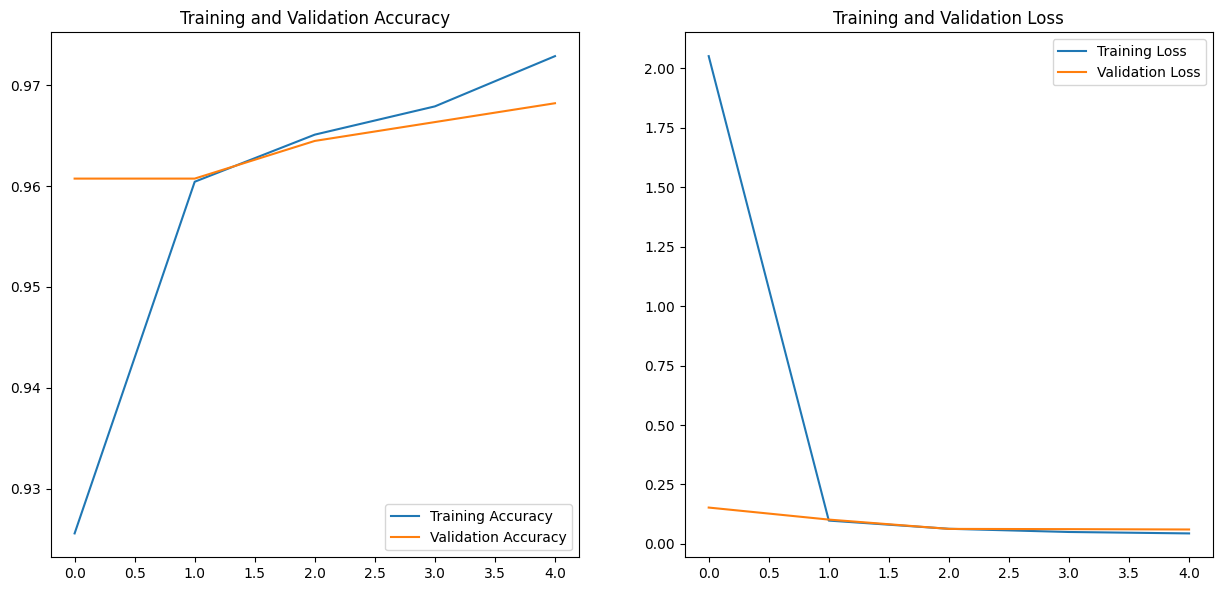

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
_, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))


from sklearn.metrics import classification_report
pred = model.predict(X_test)
#pred = (pred>0.3)
#print(pred)

y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

Test Accuracy: 96.825
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1022
           1       0.89      0.31      0.46        26
           2       0.70      0.61      0.65        23

    accuracy                           0.97      1071
   macro avg       0.85      0.64      0.70      1071
weighted avg       0.97      0.97      0.96      1071

